### Karthik B K

### Yearly sales analysis of a electric items ecommerce company

1. What was the best month for sales? How much was earned that month?
2. Which city sold the most product?
3. What time should we display advertisemens to increase the likelihood of customer’s buying product?
4. What products are most of the time sold together?
5. What are the most sold products? 


In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('./12MonthsSalesData/Sales_November_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


#### Merged all the 12 months file

In [3]:
files = [file for file in os.listdir('./12MonthsSalesData')]

FullData = pd.DataFrame()

for file in files:
    df = pd.read_csv('./12MonthsSalesData/'+file)
    FullData = pd.concat([FullData, df])

In [4]:
FullData.to_csv('AllSalesData.csv', index = False)

In [5]:
dataf = pd.read_csv('./AllSalesData.csv')
dataf.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### Data cleaning

In [6]:
#  Dropped NaN rows

nandf = dataf[dataf.isna().any(axis=1)]
display(nandf.head())

dataf = dataf.dropna(how='all')
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
#  Eliminated text in order date column

dataf = dataf[dataf['Order Date'].str[0:2] != 'Or']

In [8]:
#  Converted Quantity ordered and Price each columns into numerics

dataf['Quantity Ordered'] = pd.to_numeric(dataf['Quantity Ordered'])
dataf['Price Each'] = pd.to_numeric(dataf['Price Each'])

#### Adding necessary columns

In [9]:
# Added a month column

dataf['Months'] = dataf['Order Date'].str[0:2]
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [10]:
# Added a sales column 

dataf['sales'] = dataf['Quantity Ordered'].astype('int') * dataf['Price Each'].astype('float')

dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [11]:
# Added a city column

def get_city(address):
    return address.split(',')[1]

dataf['City'] = dataf['Purchase Address'].apply(lambda x: get_city(x))

dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [12]:
# Associated state name with cities to avoid confusions

def get_state(address):
    return address.split(',')[2].split(' ')[1] # Eliminated zip

dataf['City'] = dataf['Purchase Address'].apply(lambda x: f'{(get_city(x))} ({get_state(x)})') # concatinated Cities with states

dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


### Q1: What was the best month for sales? How much was earned that month?

In [13]:
highest_sales = dataf.groupby(['Months']).sum()

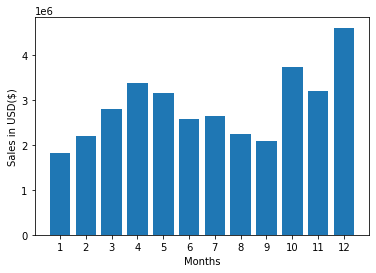

<Figure size 432x288 with 0 Axes>

In [29]:
months = range(1, 13)

plt.bar(months, highest_sales['sales'])

plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months')
plt.show()

### Q2: Which city sold the most product?

In [35]:
sales_city = dataf.groupby('City').sum()

sales_city.head(10)

,Quantity Ordered,Price Each,sales,Hour,Minutes
City,,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,214264,442932
Austin (TX),11153,1.809874e+06,1.819582e+06,141946,289060
Boston (MA),22528,3.637410e+06,3.661642e+06,288225,590442
Dallas (TX),16730,2.752628e+06,2.767975e+06,214390,435155
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,4.664317e+06,357696,733598
Portland (ME),2750,4.471893e+05,4.497583e+05,35211,72856
Portland (OR),11303,1.860558e+06,1.870732e+06,144421,295533
San Francisco (CA),50239,8.211462e+06,8.262204e+06,643265,1319477


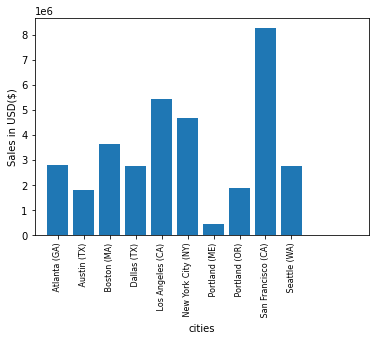

In [16]:
cities = [city for city, df in dataf.groupby('City')]

plt.bar(cities, sales_city['sales'])

plt.xticks(months)
plt.xticks(cities, rotation ="vertical", size = 8 )
plt.ylabel('Sales in USD($)')
plt.xlabel('cities')
plt.show()

### Q3: What time should we display advertisemens to increase the likelihood of customer’s buying product?

In [17]:
# Converted Order Date column to datetime format

dataf['Order Date'] = pd.to_datetime(dataf['Order Date'])
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [18]:
# Added Hours and Minutes Columns 

dataf['Hour'] = dataf['Order Date'].dt.hour
dataf['Minutes'] = dataf['Order Date'].dt.minute

dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27


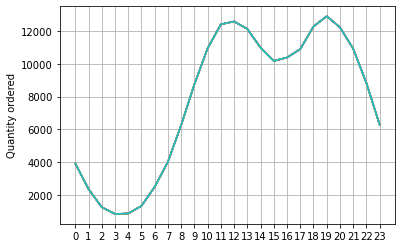

In [19]:
hours = [hour for hour, df in dataf.groupby('Hour')]

plt.plot(hours, dataf.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Quantity ordered')
plt.grid()
plt.show()

### Q4: What products are most of the time sold together?

In [20]:
duplicate = dataf[dataf['Order ID'].duplicated(keep = False)] 

duplicate.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,City,Hour,Minutes
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,31


In [21]:
duplicate['Grouped'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

duplicate.head()

<ipython-input-21-da2ad18a7f19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate['Grouped'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,City,Hour,Minutes,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [22]:
df1 = duplicate[['Order ID', 'Grouped']].drop_duplicates()

df1.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter

In [34]:
counts = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    counts.update(Counter(combinations(row_list, 5)))
counts.most_common(3)

[(('iPhone',
   'Lightning Charging Cable',
   'Apple Airpods Headphones',
   'Wired Headphones',
   'Google Phone'),
  1)]

### Q5: What are the most sold products?

In [25]:
product = dataf.groupby('Product')

qty = product.sum()['Quantity Ordered']

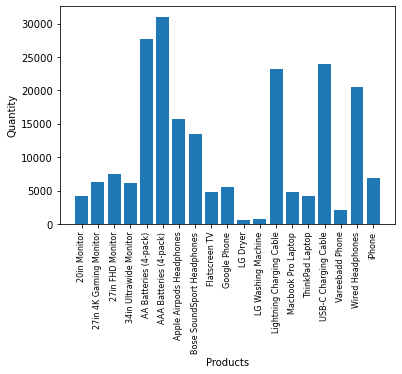

In [26]:
products = [product for product, df in product]

plt.bar(products, qty)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()